## Research Plan
Test differen netowork topology
1. Set up and import AB graph,  networkX objects []
2. set up and test fb socialgraph 
3. Set up and test twittwe social graph 

Test 
1. Test information passing
2. Test different agent behavior?

In [ ]:
import AB_model as ab 
import networkx as nx

In [ ]:
model = ab.InfoSpread (num_nodes=1000, new_edge_num=3, initial_outbreak_size=1, threshold = 2, inf_prob = 0.5)
#num_nodes=10, avg_node_degree=3, rewire_prob=.1, initial_outbreak_size=1, threshold = 2
for i in range(50):
    model.step()

In [ ]:
df = model.datacollector.get_model_vars_dataframe()
df

In [ ]:
(nx.average_clustering(model.G),
nx.average_shortest_path_length(model.G),
model.G.degree())

## batchrun

In [8]:
from mesa.batchrunner import BatchRunner
from AB_model import *

#num_nodes=10, avg_node_degree=3, rewire_prob=.1, initial_outbreak_size=1, threshold = 2
# rewire_list = []
# for i in range(21):
#     rewire_list.append(round((i*0.05),3))
#rewire_list = [0, 0.1, 0.2, 0.3]
new_edge_num_list = range(1,20)

fixed_params = {"num_nodes": 1000,
               "initial_outbreak_size" : 1,
               "threshold" : 2,
               "inf_prob" : 1,
               }
variable_params = {"new_edge_num": new_edge_num_list}  
batch_run = BatchRunner(InfoSpread,
                        variable_params,
                        fixed_params,
                        iterations=1,
                        max_steps=2000,
                        model_reporters={"infection_list": infected_list})
batch_run.run_all()

19it [02:16,  7.21s/it]


In [9]:
run_data = batch_run.get_model_vars_dataframe()

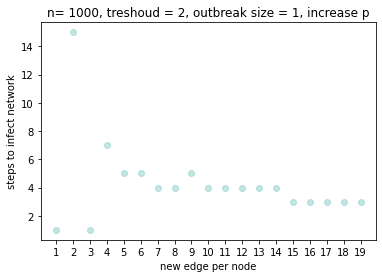

In [10]:
import matplotlib.pyplot as plt
from runtime import *

x = run_data['new_edge_num'].values.tolist()
time = calculate_infection_time(run_data)
plt.plot(x,time,'o', color = '#3CAEA3', alpha = 0.3)
plt.xlabel("new edge per node")
plt.ylabel("steps to infect network")
plt.title("n= 1000, treshoud = 2, outbreak size = 1, increase p")
plt.xticks(x)
plt.show()

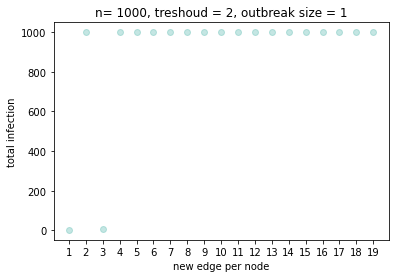

In [11]:
x = run_data['new_edge_num'].values.tolist()
inf = calculate_total_infection(run_data)
plt.plot(x,inf,'o', color = '#3CAEA3', alpha = 0.3)
plt.xlabel("new edge per node")
plt.ylabel("total infection")
plt.title("n= 1000, treshoud = 2, outbreak size = 1")
plt.xticks(x)
plt.show()